In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

%matplotlib notebook

# Constants and auxiliary functions

In [2]:
k_gauss = 9 # must be positive and odd
k_lapl = 3

In [3]:
def gaussian(im):
    im2 = cv2.GaussianBlur(im, (k_gauss,k_gauss), 0)
    return cv2.convertScaleAbs(im2)


def laplacian(im):
    im2 = cv2.Laplacian(im, cv2.CV_16S, ksize=k_lapl)
    return cv2.convertScaleAbs(im2)


def make_plots(nrows, ncols, *images):
    fig = plt.figure(figsize = (ncols*8,nrows*6))
    i = 1
    for img in images:
        ax = fig.add_subplot(nrows, ncols, i)
        ax.imshow(img[0], cmap='gray') #, vmin=0, vmax=255)
        ax.set_title(img[1])
        plt.xticks([]),plt.yticks([])
        i = i+1
        

def is_similar(image1, image2):
    return image1.shape == image2.shape and not(np.bitwise_xor(image1,image2).any())

# Gaussian

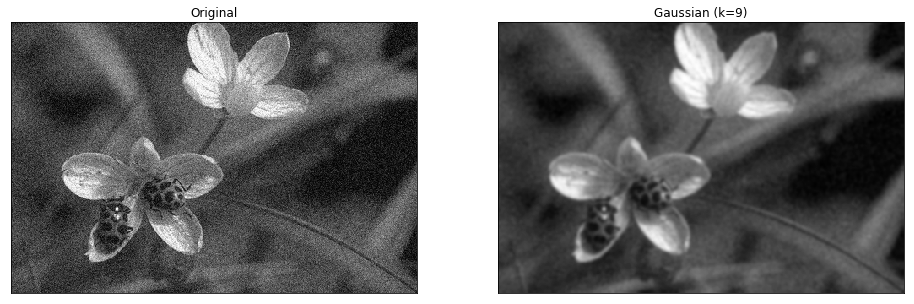

In [4]:
im = cv2.imread('flower.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_gauss = gaussian(im)

make_plots(1, 2,
           (im, 'Original'),
           (im_gauss, 'Gaussian (k={})'.format(k_gauss))
          )

# Laplacian

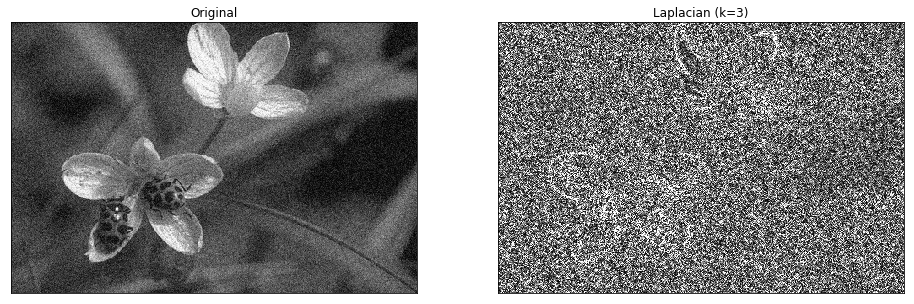

In [5]:
im_lapl = laplacian(im)

make_plots(1, 2,
           (im, 'Original'),
           (im_lapl, 'Laplacian (k={})'.format(k_lapl))
          )

# DoG and LoG

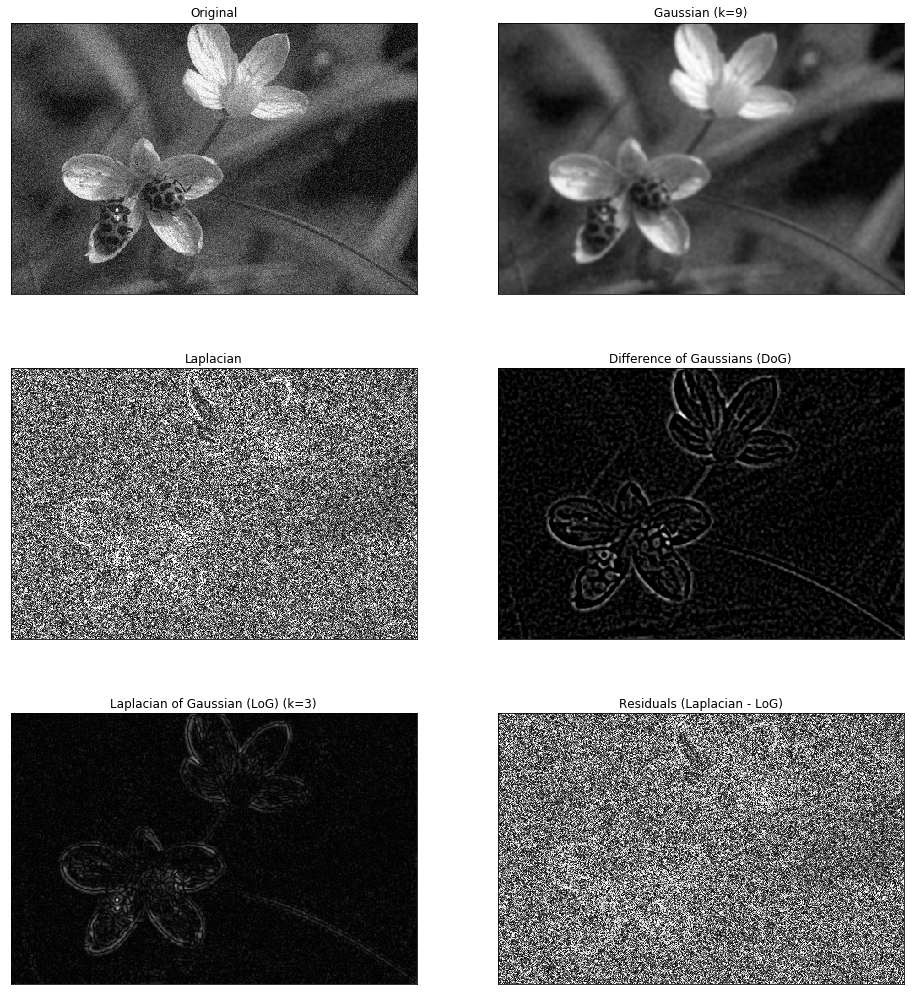

In [6]:
im_gauss_lapl = laplacian(im_gauss)
im_diff = im_lapl - im_gauss_lapl

im_gauss2 = gaussian(im_gauss)
im_dog = cv2.subtract(im_gauss2, im_gauss)

make_plots(3, 2,
           (im, 'Original'),
           (im_gauss, 'Gaussian (k={})'.format(k_gauss)),
           (im_lapl, 'Laplacian'),
           (im_dog, 'Difference of Gaussians (DoG)'),
           (im_gauss_lapl, 'Laplacian of Gaussian (LoG) (k={})'.format(k_lapl)),
           (im_diff, 'Residuals (Laplacian - LoG)')
          )

# Downsampling

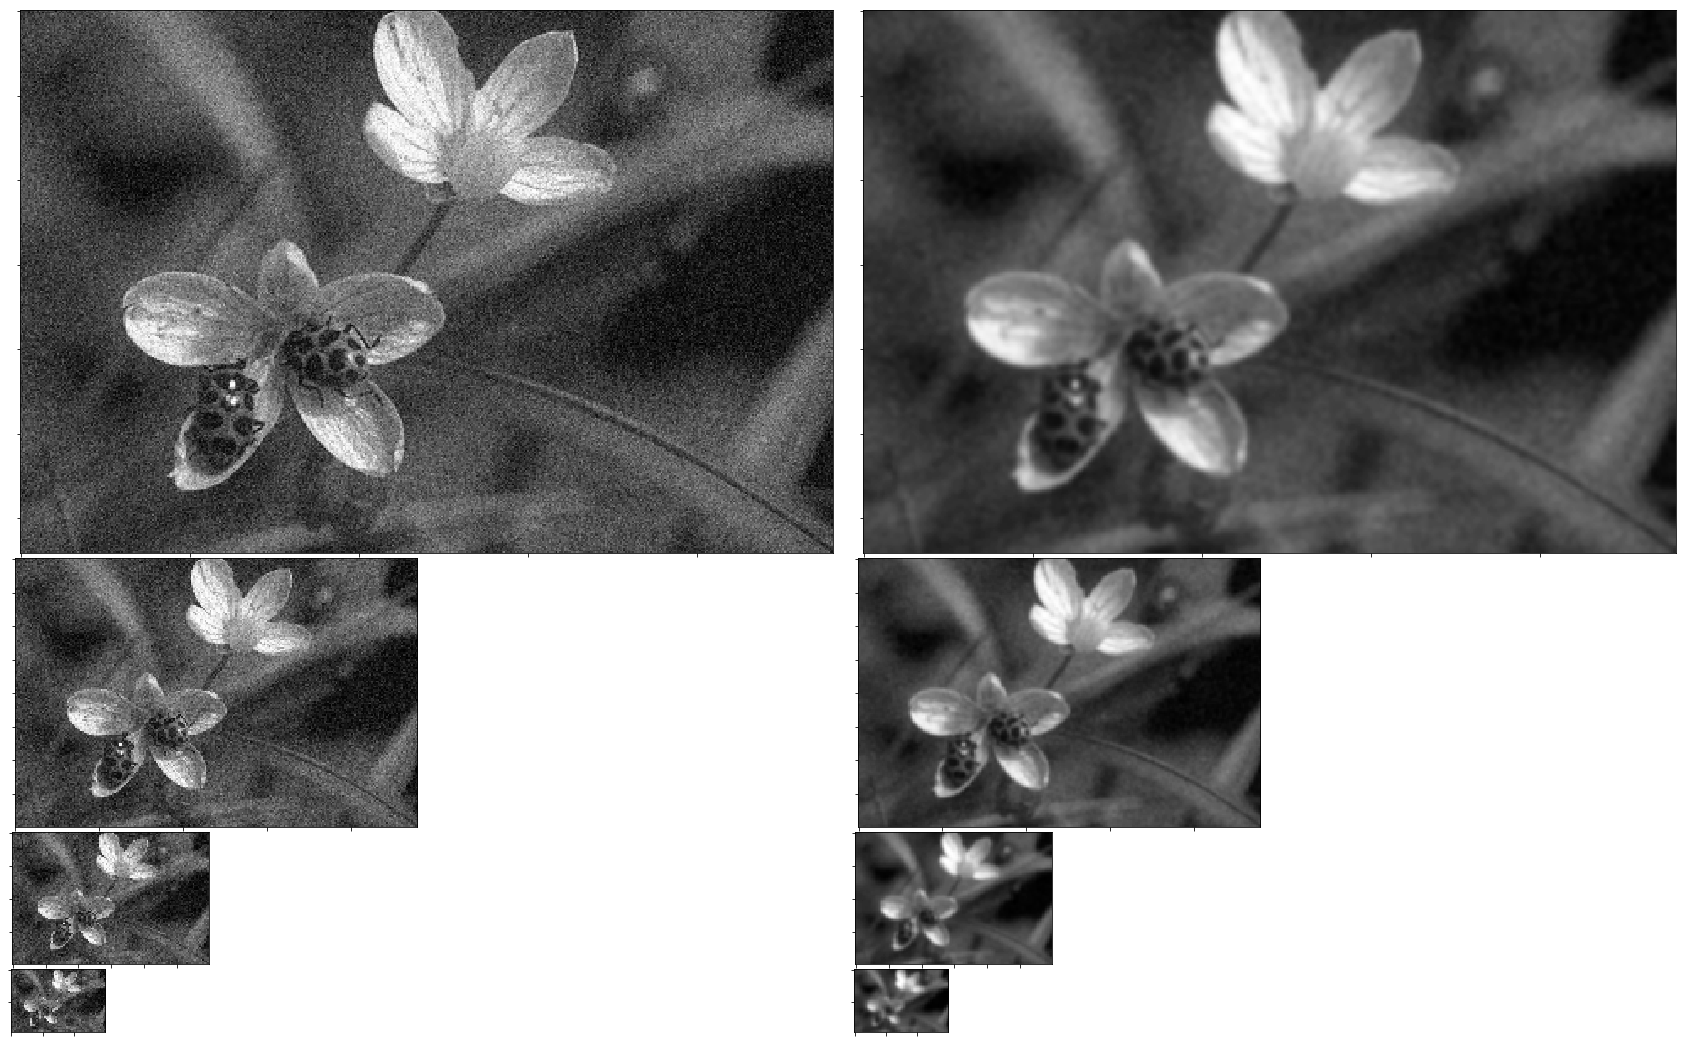

In [7]:
width = int(im.shape[1] * 50 / 100) 
height = int(im.shape[0] * 50 / 100) 
dim1 = (width, height)
gray1 = cv2.resize(im, dim1,interpolation=cv2.INTER_NEAREST)
width = int(gray1.shape[1] * 50 / 100) 
height = int(gray1.shape[0] * 50 / 100) 
dim2 = (width, height)
gray2 = cv2.resize(gray1, dim2,interpolation=cv2.INTER_NEAREST)
width = int(gray2.shape[1] * 50 / 100) 
height = int(gray2.shape[0] * 50 / 100) 
dim3 = (width, height)
gray3 = cv2.resize(gray2, dim3,interpolation=cv2.INTER_NEAREST)

gau0 = gaussian(im)
ggray1 = cv2.resize(gau0, dim1,interpolation=cv2.INTER_NEAREST)
gau1 = gaussian(ggray1)
ggray2 = cv2.resize(gau1, dim2,interpolation=cv2.INTER_NEAREST)
gau2 = gaussian(ggray2)
ggray3 = cv2.resize(gau2, dim3,interpolation=cv2.INTER_NEAREST)

dpi = 80
height, width = im.shape
figsize = 5*(width / float(dpi)), 5*(height / float(dpi))
fig = plt.figure(figsize=figsize)
gs = GridSpec(32, 32)

ax0 = plt.subplot(gs[0:16,0:16])
ax0.imshow(im, cmap='gray')
ax0.tick_params(labelbottom=False, labelleft=False)
ax1 = plt.subplot(gs[0:16,16:])
ax1.imshow(gau0, cmap='gray')
ax1.tick_params(labelbottom=False, labelleft=False)

ax2 = plt.subplot(gs[16:24,0:8])
ax2.imshow(gray1, cmap='gray')
ax2.tick_params(labelbottom=False, labelleft=False)
ax3 = plt.subplot(gs[16:24,16:24])
ax3.imshow(ggray1, cmap='gray')
ax3.tick_params(labelbottom=False, labelleft=False)

ax4 = plt.subplot(gs[24:28,0:4])
ax4.imshow(gray2, cmap='gray')
ax4.tick_params(labelbottom=False, labelleft=False)
ax5 = plt.subplot(gs[24:28,16:20])
ax5.imshow(ggray2, cmap='gray')
ax5.tick_params(labelbottom=False, labelleft=False)

ax6 = plt.subplot(gs[28:30,0:2])
ax6.imshow(gray3, cmap='gray')
ax6.tick_params(labelbottom=False, labelleft=False)
ax7 = plt.subplot(gs[28:30,16:18])
ax7.imshow(ggray3, cmap='gray')
ax7.tick_params(labelbottom=False, labelleft=False)
plt.show()